<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#News-and-Reminders" data-toc-modified-id="News-and-Reminders-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>News and Reminders</a></span></li><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Modules for this notebook</a></span></li></ul></li><li><span><a href="#Recall:-Graph-Diameter" data-toc-modified-id="Recall:-Graph-Diameter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recall: Graph Diameter</a></span><ul class="toc-item"><li><span><a href="#Breadth-First-Search-(BFS)-again" data-toc-modified-id="Breadth-First-Search-(BFS)-again-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Breadth First Search (BFS) again</a></span></li><li><span><a href="#Graph-Traversal" data-toc-modified-id="Graph-Traversal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Graph Traversal</a></span></li></ul></li><li><span><a href="#BFS-for-Distance" data-toc-modified-id="BFS-for-Distance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BFS for Distance</a></span></li><li><span><a href="#Variants-[$\color{red}{\text{For-self-study}}$]" data-toc-modified-id="Variants-[$\color{red}{\text{For-self-study}}$]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variants [$\color{red}{\text{For self-study}}$]</a></span><ul class="toc-item"><li><span><a href="#Spanning-Tree" data-toc-modified-id="Spanning-Tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Spanning Tree</a></span></li></ul></li></ul></div>

<h1>CS4423-Networks: Week 6 (19+20 Feb 2025) [$\color{red}{\text{Draft}}$]</h1>

# Part 1: Graph Diameter
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week06

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

### News and Reminders

*Dates and Deadlines*
* Assignment 1: **Deadline change to 5pm Friday 27th February**, to avoid clash with FYP presentations.
* Class Test: 14:00, Thursday 6th March (Week 8)
* Assignment 2: Week 10 or 11 (will discuss in class)

### Modules for this notebook

In [1]:
import networkx as nx
import numpy as np  # will be really important in Part 3. 
opts = { "with_labels": True,  "node_color": "xkcd:sky blue"} # show labels; nodes are sky blue

np.set_printoptions(precision=3)    # just display arrays to 3 decimal places
np.set_printoptions(suppress=True)  # avoid scientific notation (better for matrices)

## Recall: Graph Diameter

* The **distance** between nodes $x$ and $y$, denoted $d(x,y)$, is the length of the shortest between $x$ and $y$.
* The __diameter__ of the network $G$, denoted  $\mathrm{diam}(G)$,  is the length of the longest shortest path between any two nodes, $$\mathrm{diam}(G) = \max \{ d(x, y) : x, y \in X \}.$$

Now we'll see how to compute it using BFS.

### Breadth First Search (BFS) again

Consider the following problem: Given a node $x \in X$ in a graph $G$, what
are the distances $d(x, y)$ for all nodes $y \in X$?  

We know that it is possible to answer this question by looking at sums of powers of the adjacency matrix. But that is _extremely_ expensive. Also, it does not give you the paths (automatically).

Better: use *BFS*.

* BFS provides a systematic
procedure for finding these distances, and the shortest paths through
which they are realized. 

* We will start by describing how BFS works for **graph** traversal.

### Graph Traversal
In order to describe the algorithm step by step, let's recall that a node $y$
a __neighbour__ (or friend) of node $x$, if $\{x, y\}$ is an
edge, and let's denote by
$$N(x) = \{ y \in X : \{x, y\} \in E \}$$
the set of all neighbours of node $x$. 

The algorithm works through the
network **layer by layer**:
* starting with the given vertex $x$ at layer $0$
* its  neighbours at layer $1$;
* then neighbours of neighbours at layer $2$;
* and so on, until every node that can be reached from $x$ by a path has been recorded, taking care that **no node gets recorded twice**.  

Note: the layer a node is found in corresponds to its distance from the given node $x$.

In practice, for simple graph traversal, the layers do not
need to be made explicit. 

We need an example of a network to work with. For a change, let's load one from an adjacency file.\
_Syntax_: for each line in the file, the first listed node is a neighbour of all the others in that row.

In [2]:
!cat bfs.adj

A B C D E
B C F
C F
D G H
E H
F I
G I J
H J
K I J


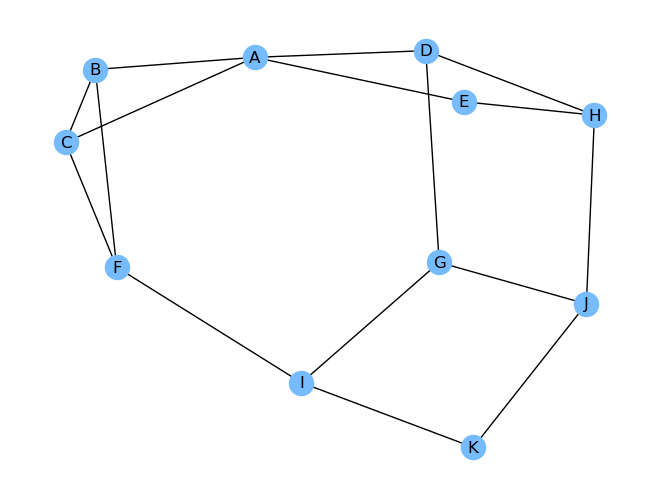

In [3]:
G4 = nx.read_adjlist("bfs.adj")
nx.draw(G4, **opts)

We set the `seen` attribute to `False`:

In [4]:
nx.set_node_attributes(G4, False, 'seen') # same as for loop above
print( G4.nodes['A'] ) # check

{'seen': False}


Initialise an empty queue, then add `A` to it, and set its `seen` attribute to `True`:

In [5]:
Q = []
Q.append('A')
G4.nodes['A']['seen'] = True
print(f"Q={Q}")

Q=['A']


Now check $N(A)$

In [6]:
list(G4.neighbors('A'))

['B', 'C', 'D', 'E']

Add neighbours of $A$ to `Q`:

In [7]:
for y in G4.neighbors('A'): 
    Q.append(y)
    G4.nodes[y]['seen'] = True    
print(Q)

['A', 'B', 'C', 'D', 'E']


In [8]:
node = 'B'
for y in G4.neighbors(node):
    if not G4.nodes[y]['seen']:
        Q.append(y)
        G4.nodes[y]['seen'] = True
print(Q) 

['A', 'B', 'C', 'D', 'E', 'F']


In [9]:
node = 'C'
for y in G4.neighbors(node):
    if not G4.nodes[y]['seen']:
        Q.append(y)
        G4.nodes[y]['seen'] = True
print(Q)

['A', 'B', 'C', 'D', 'E', 'F']


... and so on, until there are no more nodes to be processed.



Here is how to do it in a loop:

In [10]:
# 1. initialize
nx.set_node_attributes(G4, False, 'seen') # same as for loop above

G4.nodes['A']['seen'] = True
Q = ['A']  

# 2. loop
for node in Q:
    for y in G4.neighbors(node):
        if not G4.nodes[y]['seen']:
            Q.append(y)
            G4.nodes[y]['seen'] = True

# 3. output result
print(f"Q = {Q}")

Q = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']


When this process is formulated as an algorithm, we use a  __queue__
to keep track of the node whose neighbors are currently under consideration.

It can be shown that this version of the algorithm
in the common case of a [sparse network](https://en.wikipedia.org/wiki/Sparse_network)
has complexity $O(n)$, which is as good as one could hope for.

## BFS for Distance

**Breadth First Search for Distance.**
Given a simple graph
$G = (X, E)$ and a vertex $x \in X$,
determine $d(x, y)$ for all nodes $y \in X$.


1. [Initialize.]  Suppose that $X = \{x_0, x_1, \ldots, x_{n-1}\}$
and that $x = x_j$.  Set $d_i \gets \perp$ (undefined) for $i = 0, \dots, n{-}1$.
Set $d_j \gets 0$ and initialize a queue $Q \gets (x_j)$.

2. [Loop.] While $Q \neq \emptyset$:
   * pop node $x_k$ off $Q$
   * for each neighbor $x_l$ of $x_k$ with $d_l = \perp$:
       * push $x_l$ onto $Q$ and set $d_l \gets d_k + 1$.

3. [Stop.] Return the array $(d_0, \dots, d_{n-1})$.

Note: the  $d$ attribute records both the distance, and also whether the node has been visited. Also $d$ is set immediately when it is pushed onto $Q$, rather than later when it pops off $Q$. 

In [13]:
nx.set_node_attributes(G4, None, 'd') 
x = 'A'              #starting BFS at vertex A
G4.nodes[x]['d'] = 0 # and setting its distance to 0
Q = []
Q.append(x)
print(Q)

['A']


In [14]:
while len(Q)>0:
    x = Q.pop(0)
    for y in G4.neighbors(x):
        if G4.nodes[y]['d'] is None: # checking if the distance is undefined
            G4.nodes[y]['d'] = G4.nodes[x]['d'] + 1 # if so, define using previous
            Q.append(y)
    print(f"{x} : {Q}")

A : ['B', 'C', 'D', 'E']
B : ['C', 'D', 'E', 'F']
C : ['D', 'E', 'F']
D : ['E', 'F', 'G', 'H']
E : ['F', 'G', 'H']
F : ['G', 'H', 'I']
G : ['H', 'I', 'J']
H : ['I', 'J']
I : ['J', 'K']
J : ['K']
K : []


In [15]:
print([G4.nodes[x]['d'] for x in G4])

[0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]


## Variants [$\color{red}{\text{For self-study}}$]

BFS is an extremely versatile algorithm, which applies in many different situations and can be adapted to produce additional information on a network.

For example, BFS run on a node $x$ in a network $G = (X, E)$ determines the __connected component__ of $x$ in $G$ (as the set of all nodes that get a distance value assigned). 

### Spanning Tree 

With little more work (and an additional array) BFS can produce
a __spanning tree__ (or __shortest path tree__).
Here, whenever node $x_l$ is pushed onto $Q$, it is assigned
the current node $x_k$ (in the additional array)
as its predecessor on a shortest path from $x_j$ to $x_l$.
The subgraph of the network consisting of these edges is a tree.
As a tree, it has exactly one path between the given node $x$
and any of its
vertices $y$ and, by construction, this path is a shortest path
between $x$ and $y$.

In [16]:
nx.set_node_attributes(G4, None, 'd') 
x = 'A' # start with vertex A
G4.nodes[x]['d'] = 0    # set its distance to 0
Q = [] # initialise a queue Q
Q.append(x)  # push x in Q

nx.set_edge_attributes(G4, False, 'seen')

In [17]:
while len(Q)>0:
    x = Q.pop(0) # pop a vertex from the queue
    for y in G4.neighbors(x):
        if not G4.nodes[y]['d']: # undefined? 
            G4.nodes[y]['d'] = G4.nodes[x]['d'] + 1 # set distance
            Q.append(y) # push in queue
            G4.edges[x, y]['seen'] = True # set relevant edge to seen
    print(x, ": ", Q)

A :  ['B', 'C', 'D', 'E']
B :  ['C', 'D', 'E', 'A', 'F']
C :  ['D', 'E', 'A', 'F']
D :  ['E', 'A', 'F', 'G', 'H']
E :  ['A', 'F', 'G', 'H']
A :  ['F', 'G', 'H']
F :  ['G', 'H', 'I']
G :  ['H', 'I', 'J']
H :  ['I', 'J']
I :  ['J', 'K']
J :  ['K']
K :  []


In [18]:
print(G4.edges())

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'F'), ('C', 'F'), ('D', 'G'), ('D', 'H'), ('E', 'H'), ('F', 'I'), ('G', 'I'), ('G', 'J'), ('H', 'J'), ('I', 'K'), ('J', 'K')]


In [19]:
sub = [e for e in G4.edges if G4.edges[e]['seen']]
# subset of edges 'seen' while visiting the graph

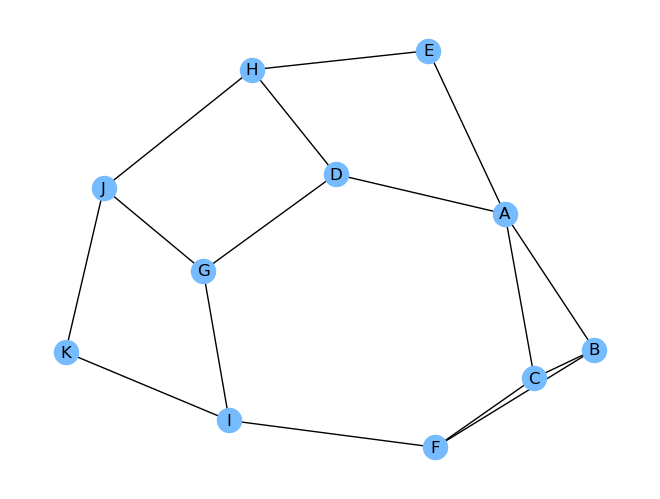

In [20]:
pos = nx.spring_layout(G4)
nx.draw(G4, **opts, pos=pos)


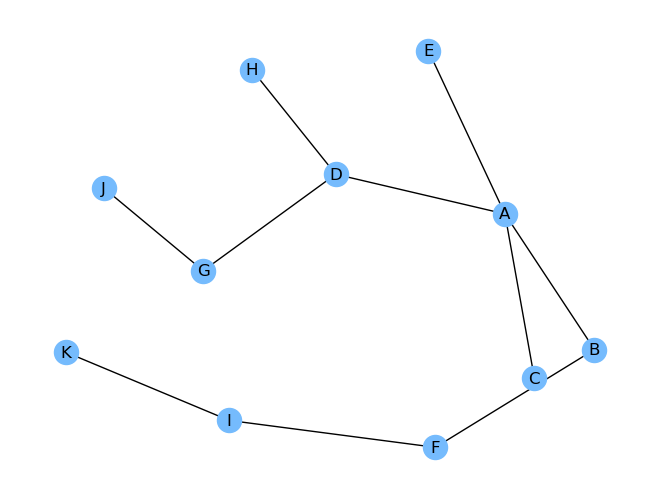

In [21]:
nx.draw(G4.edge_subgraph(sub), **opts, pos=pos)

Or, one could highlight the spanning tree inside the graph by using, say,
red as color for the spanning edges (and blue for the rest).

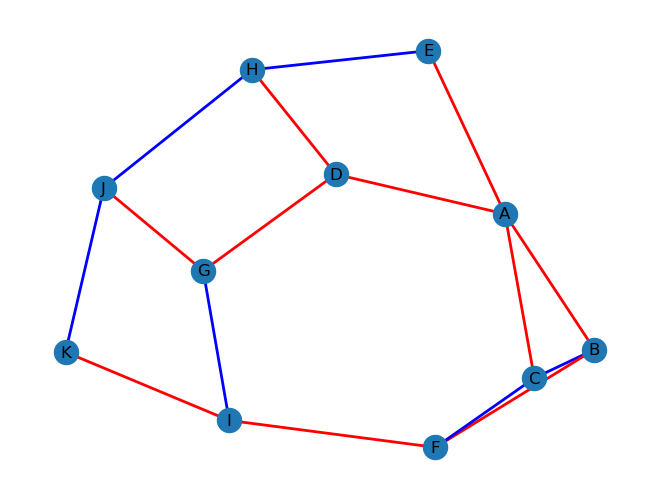

In [22]:
colors = ['red' if G4.edges[e]['seen'] else 'blue' for e in G4.edges]
nx.draw(G4, edge_color = colors, with_labels = True, width=2.0, pos=pos)

* Of course, in order to find distances, or shortest paths
between **all pairs** of nodes $x$ and $y$ in a network, one can
perform BFS for each of the nodes $x \in X$ in turn.

* As an exercise in a future assignment, you will see more in detail an implementation of BFS aimed at constructing a spanning tree.

* The algorithm and its variants also works on directed networks,
but the results then will have to be interpreted in the context of
directed networks.

More about BFS can be found in [Newman, Section 10.3].

<div class="alert alert-block alert-info">End of Part 1</div>